# The Spark Foundation : Data Science & Business analytics intern (GRIP)
# Task 1 : Predicting using Supervised ML - prediction percentage of student based on study hours
# GRIPSEPT23
 
# Name - Sanjoli Kesarwani


# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf

# Reading the data

In [2]:
student_df= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv" )
student_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Exploration

In [3]:
student_df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
student_df.shape

(25, 2)

In [6]:
student_df.duplicated().sum()

0

In [7]:
student_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
student_df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
distinct_hrs=student_df.Hours.nunique()
print("No of unique values of study hours is:",distinct_hrs)

No of unique values of study hours is: 23


In [10]:
distinct_scores=student_df.Scores.nunique()
print("No of unique values of %age of marks is:",distinct_scores)

No of unique values of %age of marks is: 23


# Descriptive Statistics

In [11]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

C:\Users\abc\AppData\Local\Temp\ipykernel_2860\974934487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_df["Hours"],color='red')


<Axes: xlabel='Hours', ylabel='Density'>

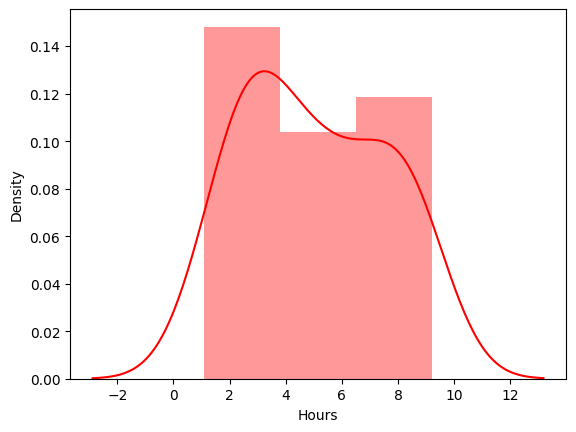

In [12]:
sns.distplot(student_df["Hours"],color='red')

C:\Users\abc\AppData\Local\Temp\ipykernel_2860\1348929518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_df['Scores'],color='green')


<Axes: xlabel='Scores', ylabel='Density'>

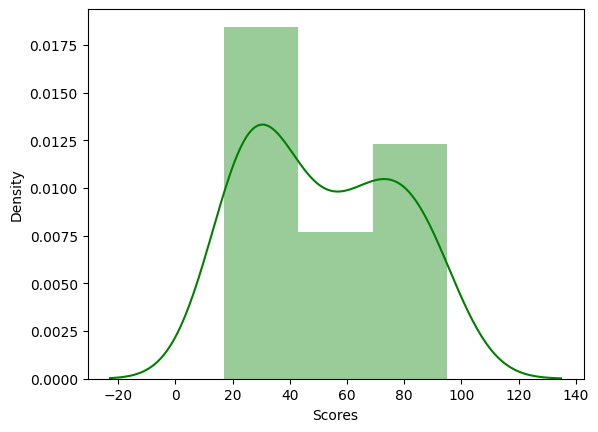

In [13]:
sns.distplot(student_df['Scores'],color='green')

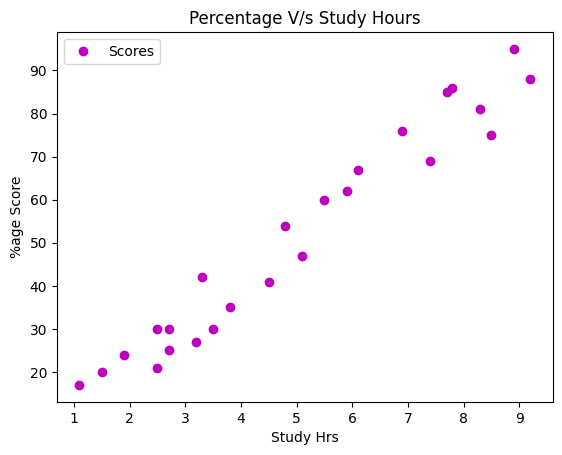

In [14]:
student_df.plot(x='Hours', y='Scores',style='om')
plt.title('Percentage V/s Study Hours')
plt.xlabel('Study Hrs')
plt.ylabel('%age Score')
plt.show()

In [15]:
student_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Training and testing 

In [16]:
x = student_df.iloc[:, :-1].values  
y = student_df.iloc[:, 1].values 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import math

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression()

<Axes: xlabel='Hours', ylabel='Scores'>

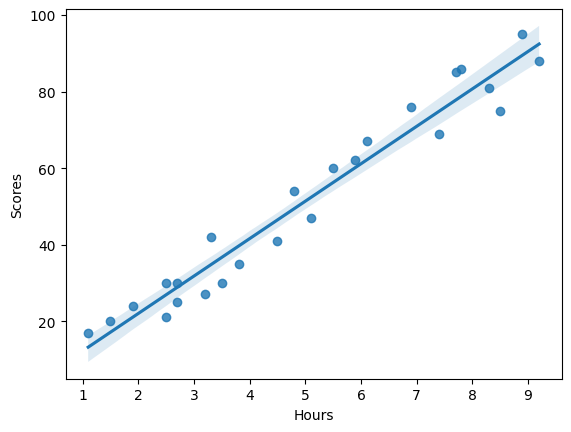

In [19]:
sns.regplot(x='Hours',y='Scores',data=student_df)

In [20]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [21]:
y_predicted = model.predict(x_test)
print(y_predicted)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
print("The actual scores V/S the predicted scores:\n",df)

The actual scores V/S the predicted scores:
    Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


In [23]:
model_accuracy_score= model.score(x_train,y_train)
print("The model accuracy is:",model_accuracy_score)

The model accuracy is: 0.9484997422695115


In [24]:
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


In [25]:
MSE= metrics.mean_squared_error(y_test,y_predicted)
RMSE= math.sqrt(MSE)
print("Root Mean Square Error:\n",RMSE)

Root Mean Square Error:
 4.792191274636315


In [26]:
print('Mean Absolute Error:\n',metrics.mean_absolute_error(y_test, y_predicted))

Mean Absolute Error:
 4.419727808027652


In [27]:
print('Mean Squared Error:\n',metrics.mean_squared_error(y_test, y_predicted))

Mean Squared Error:
 22.96509721270043


In [28]:
print('R-square:\n',metrics.r2_score(y_test, y_predicted))

R-square:
 0.9568211104435257


In [29]:
model=smf.ols("Scores~Hours",data=student_df).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           9.13e-17
Time:                        17:08:26   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""